# IMDB dataset

#### Classify movie reviews as either positive or negative based on the words used

The x data is a list of indices in the list of all words for each word that appears <br>
The y data is a 0 if the review was negative and 1 if the review was positive <br>

This is a binary classification problem

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as graph

graph.style.use('fivethirtyeight')

from keras import models
from keras import layers
from keras.datasets import imdb
from sklearn.preprocessing import StandardScaler

/home/harshil/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Train test split

n_words = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_words)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


The reviews were converted to just include 1000 of the most frequent words and so becomes hard to read when decoded

In [3]:
# Example review
word_index = imdb.get_word_index()

reverse_word_index = {value: key for key, value in word_index.items()}
decoded_review = ' '.join([reverse_word_index[idx] for idx in x_train[0]])
print(decoded_review)

the as you with out themselves powerful and and their becomes and had and of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every and and movie except her was several of enough more with is now and film as you of and and unfortunately of you than him that with out themselves her get for was and of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of and and with heart had and they of here that with her serious to have does when from why what have and they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br and to whether from than out themselves history he name half some br of and and was two most of mean for 1 any an and she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script their with her and most that with wasn't to wit

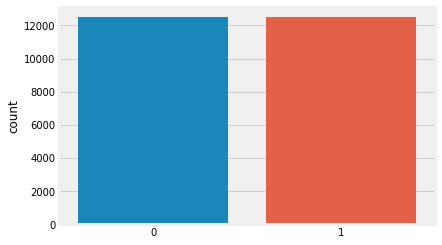

In [4]:
sns.countplot(y_train)
graph.show()

In [5]:
# Convert the list of indices to a feature set n_words long with a zero or one indicating prescence of the words

def vectorize_data(data, dimension=n_words):
    results = np.zeros((len(data), dimension))
    for i, seq in enumerate(data):
        results[i, seq] = 1
    return results

x_train = vectorize_data(x_train)
x_test = vectorize_data(x_test)

val_size = 10000
x_val_test, x_val_train = x_train[:val_size], x_train[val_size:]
y_val_test, y_val_train = y_train[:val_size], y_train[val_size:] 

In [6]:
# Train model on validation

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_val_train, y_val_train, 
    epochs=5, batch_size=512, 
    validation_data=(x_val_test, y_val_test)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 0s 27us/step - loss: 0.6354 - acc: 0.6588 - val_loss: 0.5246 - val_acc: 0.7789
Epoch 2/5
15000/15000 [==============================] - 0s 14us/step - loss: 0.4370 - acc: 0.8175 - val_loss: 0.3834 - val_acc: 0.8380
Epoch 3/5
15000/15000 [==============================] - 0s 14us/step - loss: 0.3460 - acc: 0.8564 - val_loss: 0.3482 - val_acc: 0.8533
Epoch 4/5
15000/15000 [==============================] - 0s 14us/step - loss: 0.3144 - acc: 0.8696 - val_loss: 0.3413 - val_acc: 0.8576
Epoch 5/5
15000/15000 [==============================] - 0s 14us/step - loss: 0.3004 - acc: 0.8767 - val_loss: 0.3477 - val_acc: 0.8564


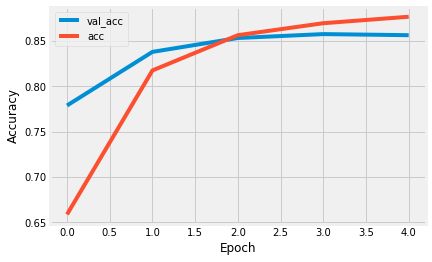

In [7]:
for key, value in history.history.items():
    if 'acc' in key:
        graph.plot(value, label=key)
        graph.ylabel('Accuracy')
        graph.xlabel('Epoch')
        graph.legend()
graph.show()

In [8]:
# Train model on full training set 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
25000/25000 [==============================] - 0s 16us/step - loss: 0.5330 - acc: 0.7435
Epoch 2/5
25000/25000 [==============================] - 0s 10us/step - loss: 0.3764 - acc: 0.8458
Epoch 3/5
25000/25000 [==============================] - 0s 10us/step - loss: 0.3320 - acc: 0.8625
Epoch 4/5
25000/25000 [==============================] - 0s 9us/step - loss: 0.3178 - acc: 0.8681
Epoch 5/5
25000/25000 [==============================] - 0s 10us/step - loss: 0.3099 - acc: 0.8695


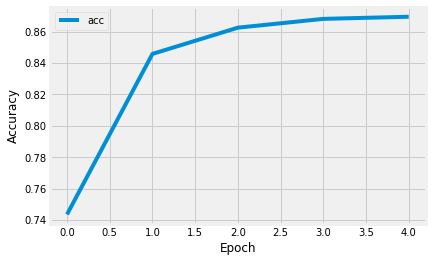

In [9]:
for key, value in history.history.items():
    if 'acc' in key:
        graph.plot(value, label=key)
        graph.ylabel('Accuracy')
        graph.xlabel('Epoch')
        graph.legend()
graph.show()

In [10]:
# Test model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.3f}')

25000/25000 [==============================] - 1s 34us/step
Test Accuracy: 0.860
